# 2D Pendulum

In [1]:
import sympy as sp
Q,A,ωD=sp.symbols('Q A \omega_D')
θ = sp.Function(r"\theta")(Q,A)
ω = sp.Function("\omega")(Q,A)
φ = sp.Function(r"\varphi")(Q,A)
dθ = ω
dω = -ω/Q-sp.sin(θ)+A*sp.cos(0.)
dφ = ωD
lista_parametara = [A,Q]
N_P = len(lista_parametara)
lista_funkcija = [θ, ω]
lista_jednadzbi  = [dθ,dω]
lista_derivacija = [[p] for p in lista_parametara]+[[lista_parametara[i],lista_parametara[j]] for i in range(N_P) for j in range(i,N_P)]

sp.init_printing()
lista = []
i = 0
for f in lista_funkcija:
    lista.append([str(f),'y[%d]'%i])
    i+=1

for a in lista_derivacija:
    for f in lista_funkcija:
        lista.append([str(sp.Derivative(f,*a,evaluate=True)),'y[%d]'%i])
        i+=1

for k in ['cos','sin']:
    lista.append([k,"np."+k])
def zamjena(string, repl):
    st = string
    for r in repl[::-1]:
        st = st.replace(*r)
    return st
i = 0
for f in lista_jednadzbi:
    print(zamjena(str(f),lista),end=',')
    i+=1
print()
for a in lista_derivacija:
    for f in lista_jednadzbi:
        print(zamjena(str(sp.Derivative(f,*a,evaluate=True)),lista),end=',')
        i+=1
    print(" #",str(a))

y[1],A - np.sin(y[0]) - y[1]/Q,
y[3],-np.cos(y[0])*y[2] + 1 - y[3]/Q, # [A]
y[5],-np.cos(y[0])*y[4] - y[5]/Q + y[1]/Q**2, # [Q]
y[7],np.sin(y[0])*y[2]**2 - np.cos(y[0])*y[6] - y[7]/Q, # [A, A]
y[9],np.sin(y[0])*y[2]*y[4] - np.cos(y[0])*y[8] - y[9]/Q + y[3]/Q**2, # [A, Q]
y[11],np.sin(y[0])*y[4]**2 - np.cos(y[0])*y[10] - y[11]/Q + 2*y[5]/Q**2 - 2*y[1]/Q**3, # [Q, Q]


In [5]:
3*2*(2+3)/2+3

In [8]:
%run "MBAM_codes.py"
class model(MBAM_odeint):
    def __init__(self,**odeint_kwargs):
        self.IC     = [-2,0]
        
        self.T      = np.linspace(0,50,100)
        self.xlim   = [0.001,2]
        self.ylim   = [0.001,2]
        self.θbf    = [1.,1.]
        self._title = r'Pendulum_2D/pendulum'
        self.N_parameters = 2
        self.N_equations  = 2
        num = int(self.N_equations*self.N_parameters*(self.N_parameters+3)/2)
        self.INI    = np.array(self.IC+num*[0.])
        MBAM_odeint.__init__(self, self._function, self.T, 
                             self.INI,self.N_parameters, 
                             self.N_equations,**odeint_kwargs)
    def _function(self,y,t,θ):
        A,Q = θ
        return np.array([y[1],A - np.sin(y[0]) - y[1]/Q,
y[3],-np.cos(y[0])*y[2] + 1 - y[3]/Q, # [A]
y[5],-np.cos(y[0])*y[4] - y[5]/Q + y[1]/Q**2, # [Q]
y[7],np.sin(y[0])*y[2]**2 - np.cos(y[0])*y[6] - y[7]/Q, # [A, A]
y[9],np.sin(y[0])*y[2]*y[4] - np.cos(y[0])*y[8] - y[9]/Q + y[3]/Q**2, # [A, Q]
y[11],np.sin(y[0])*y[4]**2 - np.cos(y[0])*y[10] - y[11]/Q + 2*y[5]/Q**2 - 2*y[1]/Q**3, # [Q, Q]
                        ])
    def simulate(self):
        y, _, g, _, _, _ = self.find_solutions(self.θbf)
        V0               = self.metric_eigenvector(g)
        init = np.append(self.θbf,V0)
        ys  =y+np.random.normal(0,1,self.N_equations*self.T.size).reshape(self.T.size,self.N_equations)
        r = ys-y
        self._ys = ys
        self._y  = y
        self._rs = r
        self.init = init
        self._V0  = V0
M = model()
M.simulate()

τ=np.linspace(0,0.08,10)
MBAM = M.run_MBAM(M.init, τ)




/home/ktisanic/anaconda3/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/ktisanic/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1874: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


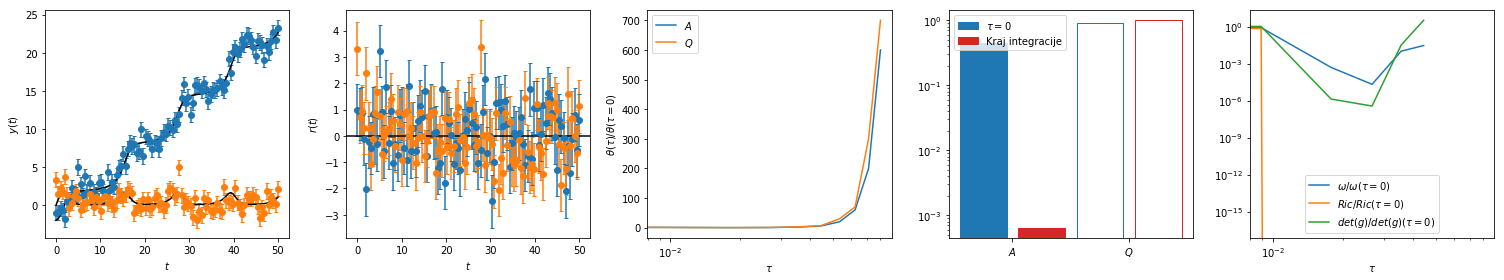

In [11]:
f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=['$A$','$Q$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u]/MBAM.θ[0,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0/MBAM.ω0[0],label=r'$\omega/\omega(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.R/MBAM.R[0],label=r'$Ric/Ric(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.detg/MBAM.detg[0],label=r'$det(g)/det(g)(\tau=0)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)/\theta(\tau=0)$')
ax[2].set_xscale('log')
ax[4].set_xscale('log')
ax[4].set_yscale('log')
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model_full.pdf')